In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap


# Set face colors for plots
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})

# Define a categorical color palette
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

# Dynamically extend the palette to match the number of categories
def extend_palette(categories, base_palette):
    num_categories = len(categories)
    if num_categories > len(base_palette):
        cmap = cm.get_cmap('tab20', num_categories)  # Use a scalable colormap like tab20
        return [mcolors.rgb2hex(cmap(i)) for i in range(num_categories)]
    return base_palette

# Example: Assign a ListedColormap only for heatmaps or continuous scales
cmap = ListedColormap(palette)

# Load the dfset
file_path = '/Users/tanishq/Desktop/Projects/cybersecurity_attacks.csv'
df = pd.read_csv(file_path)




In [3]:
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 'yes' if x == 'Alert Triggered' else 'no')
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'No proxy' if pd.isna(x) else x)
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 'No df' if pd.isna(x) else x)
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 'No df' if pd.isna(x) else x)
df.isnull().sum().sort_values(ascending=False)

Timestamp                 0
Attack Type               0
IDS/IPS Alerts            0
Firewall Logs             0
Proxy Information         0
Geo-location Data         0
Network Segment           0
Device Information        0
User Information          0
Severity Level            0
Action Taken              0
Attack Signature          0
Alerts/Warnings           0
Source IP Address         0
Anomaly Scores            0
Malware Indicators        0
Payload Data              0
Traffic Type              0
Packet Type               0
Packet Length             0
Protocol                  0
Destination Port          0
Source Port               0
Destination IP Address    0
Log Source                0
dtype: int64

In [4]:

# Convert the 'Timestamp' column to a datetime object
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Drop rows with invalid timestamps after conversion
df = df.dropna(subset=['Timestamp'])

# Extract date and time components from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
df['DayName'] = df['Timestamp'].dt.day_name()  # Name of the day


In [5]:
import re

# Extract browser and device type from "Device Information" column
def extract_browser_and_device(info):
    browser_pattern = r"(Chrome|Firefox|Safari|Edge|Opera|Mozilla)"
    device_pattern = r"(iPhone|iPad|Android|Windows|Mac|Linux)"
    
    browser = re.search(browser_pattern, str(info))
    device = re.search(device_pattern, str(info))
    
    return (browser.group(0) if browser else "Unknown", 
            device.group(0) if device else "Unknown")

# Add new columns for Browser and Device/OS
df['Browser'], df['Device/OS'] = zip(*df['Device Information'].apply(extract_browser_and_device))

# Display the updated dataframe with the new columns
df[['Device Information', 'Browser', 'Device/OS']].head()

,Device Information,Browser,Device/OS
0,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Mozilla,Windows
1,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Mozilla,Windows
2,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Mozilla,Windows
3,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Mozilla,Mac
4,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Mozilla,Windows


In [6]:
missing_values = df.isnull().sum()


In [7]:
missing_values

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
DayOfWeek                 0
DayName                   0
Browser                   0
Device/OS                 0
dtype: int64

In [8]:
df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Year,Month,Day,Hour,Minute,Second,DayOfWeek,DayName,Browser,Device/OS
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,2023,5,30,6,33,58,1,Tuesday,Mozilla,Windows
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,2020,8,26,7,8,30,2,Wednesday,Mozilla,Windows
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,2022,11,13,8,23,25,6,Sunday,Mozilla,Windows
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,2023,7,2,10,38,46,6,Sunday,Mozilla,Mac
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,2023,7,16,13,11,7,6,Sunday,Mozilla,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,2023,5,26,14,8,42,4,Friday,Mozilla,iPad
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,2023,3,27,0,38,27,0,Monday,Mozilla,Windows
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,2022,3,31,1,45,49,3,Thursday,Mozilla,Windows
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,2023,9,22,18,32,38,4,Friday,Mozilla,Linux


/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/304291496.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


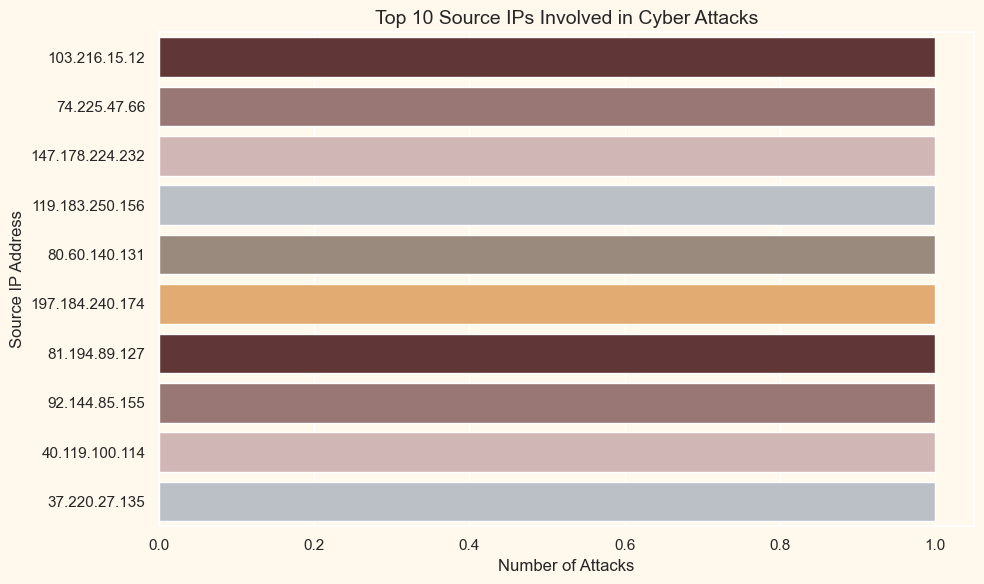

<Figure size 640x480 with 0 Axes>

In [59]:
# Corrected Bar Chart for Top 10 Source IPs
top_source_ips = df['Source IP Address'].value_counts().head(10)

# Extend the color palette dynamically if needed
palette_extended = palette * (len(top_source_ips) // len(palette) + 1)

# Plot the bar chart without using hue
plt.figure(figsize=(10, 6))
sns.barplot(
    y=top_source_ips.index,
    x=top_source_ips.values,
    palette=palette_extended[:len(top_source_ips)]  # Adjust palette size dynamically
)
plt.title('Top 10 Source IPs Involved in Cyber Attacks', fontsize=14)
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Source IP Address', fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig('/Users/tanishq/Desktop/Projects/Top 10 Source IPs Involved in Cyber Attacks', bbox_inches='tight')


/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/1358079891.py:4: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_dest_ports.index, y=top_dest_ports.values,hue=top_dest_ports.index, palette=palette)


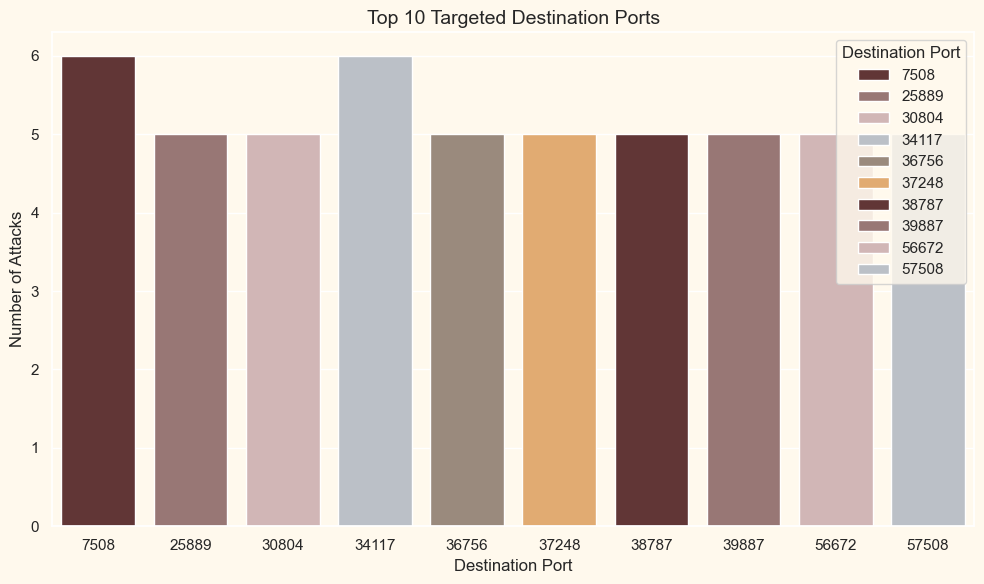

In [53]:
# 2. Top 10 Destination Ports
top_dest_ports = df['Destination Port'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_dest_ports.index, y=top_dest_ports.values,hue=top_dest_ports.index, palette=palette)
plt.title('Top 10 Targeted Destination Ports', fontsize=14)
plt.xlabel('Destination Port', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.tight_layout()
plt.show()

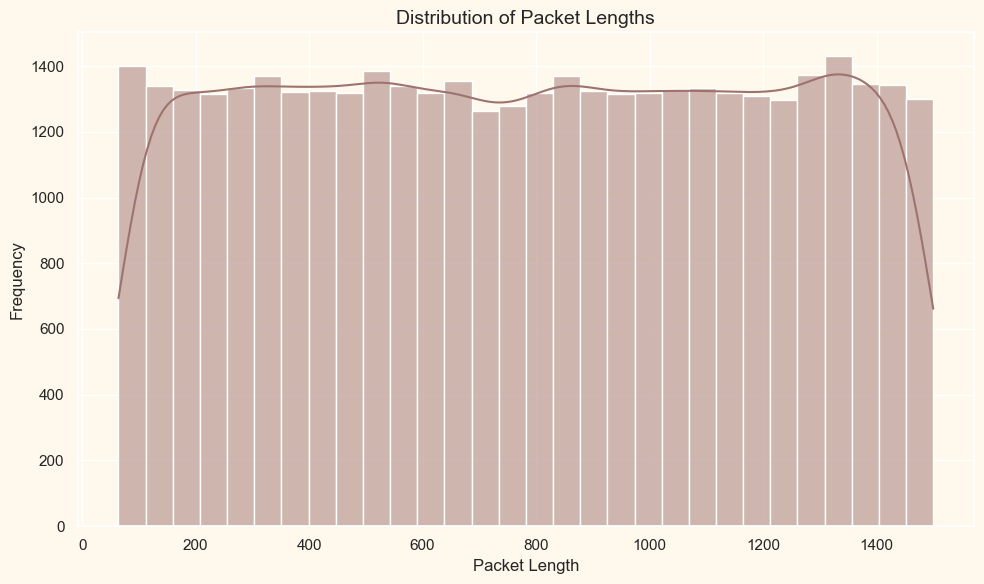

In [11]:
# 3. Distribution of Packet Lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['Packet Length'], bins=30, color=palette[1], kde=True)
plt.title('Distribution of Packet Lengths', fontsize=14)
plt.xlabel('Packet Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

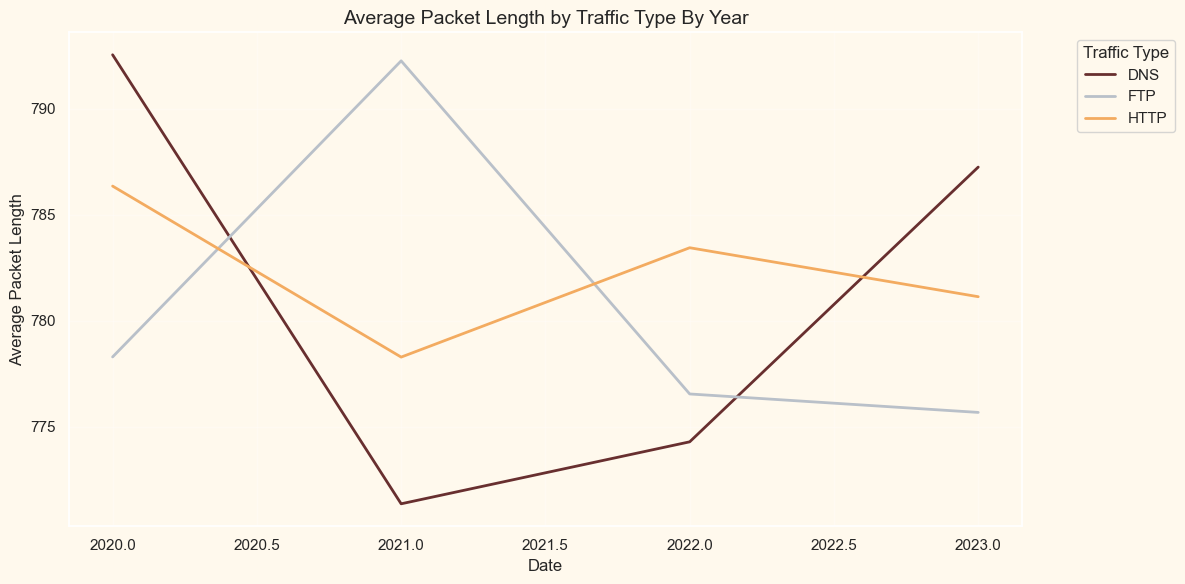

In [12]:
# Preprocessing df for line chart: Packet Length by Traffic Type over time
line_chart_df = df.groupby(['Year', 'Traffic Type'])['Packet Length'].mean().unstack()

# Visualization 2: Line chart showing trends in Packet Length over time
line_chart_df.plot(figsize=(12, 6), colormap=cmap, linewidth=2)
plt.title('Average Packet Length by Traffic Type By Year', fontsize=14)
plt.ylabel('Average Packet Length')
plt.xlabel('Date')
plt.legend(title='Traffic Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

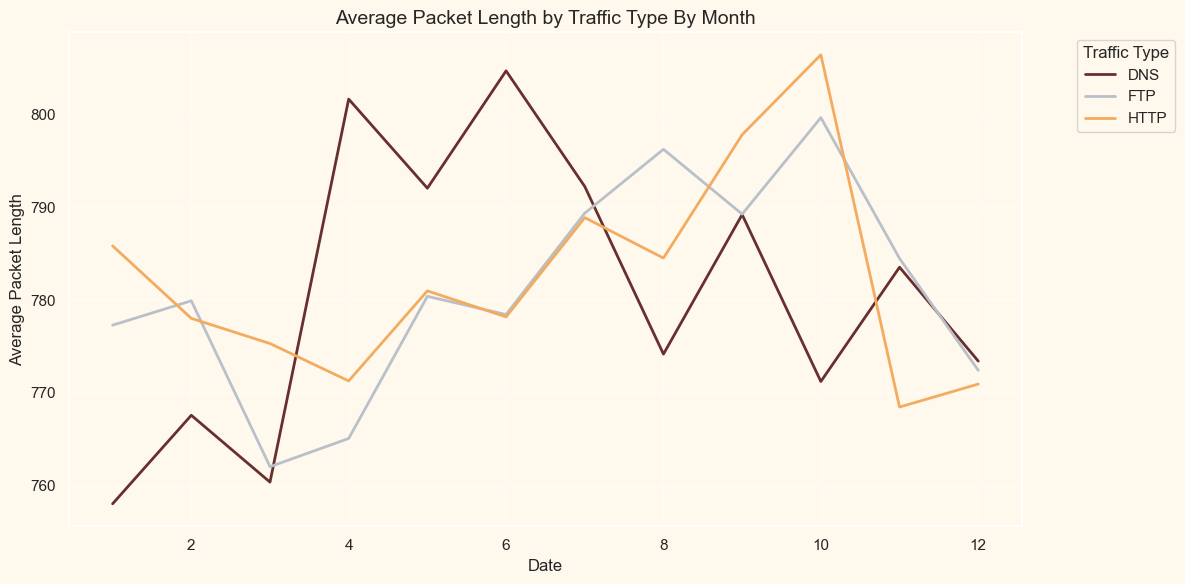

In [13]:
# Preprocessing df for line chart: Packet Length by Traffic Type over time
line_chart_df2 = df.groupby(['Month', 'Traffic Type'])['Packet Length'].mean().unstack()

# Visualization 2: Line chart showing trends in Packet Length over time
line_chart_df2.plot(figsize=(12, 6), colormap=cmap, linewidth=2)
plt.title('Average Packet Length by Traffic Type By Month', fontsize=14)
plt.ylabel('Average Packet Length')
plt.xlabel('Date')
plt.legend(title='Traffic Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/3502916724.py:3: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(data=df, x='Attack Type', hue='Severity Level', palette=palette)


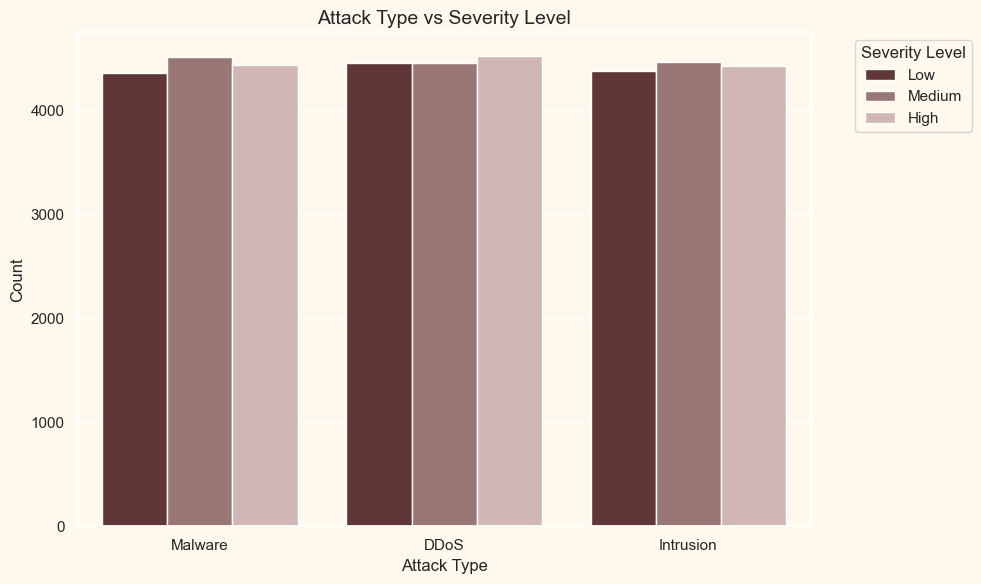

In [14]:
# 4. Attack Type vs Severity Level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attack Type', hue='Severity Level', palette=palette)
plt.title('Attack Type vs Severity Level', fontsize=14)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Severity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

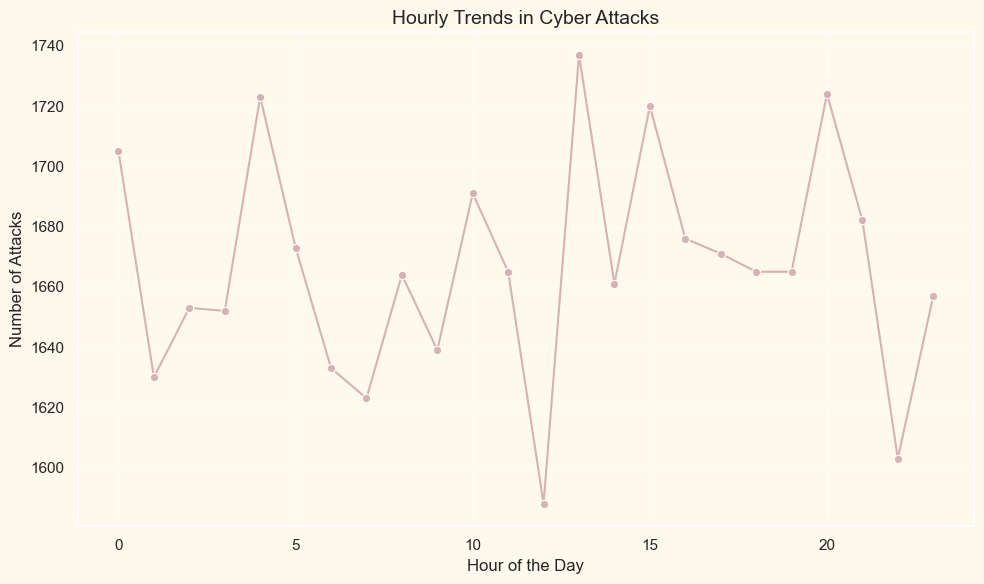

In [15]:
# 5. Hourly Trends in Cyber Attacks
hourly_trends = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_trends.index, y=hourly_trends.values, color=palette[2], marker='o')
plt.title('Hourly Trends in Cyber Attacks', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/3089416291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Severity Level', y='Anomaly Scores', palette=palette)
/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/3089416291.py:3: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(data=df, x='Severity Level', y='Anomaly Scores', palette=palette)


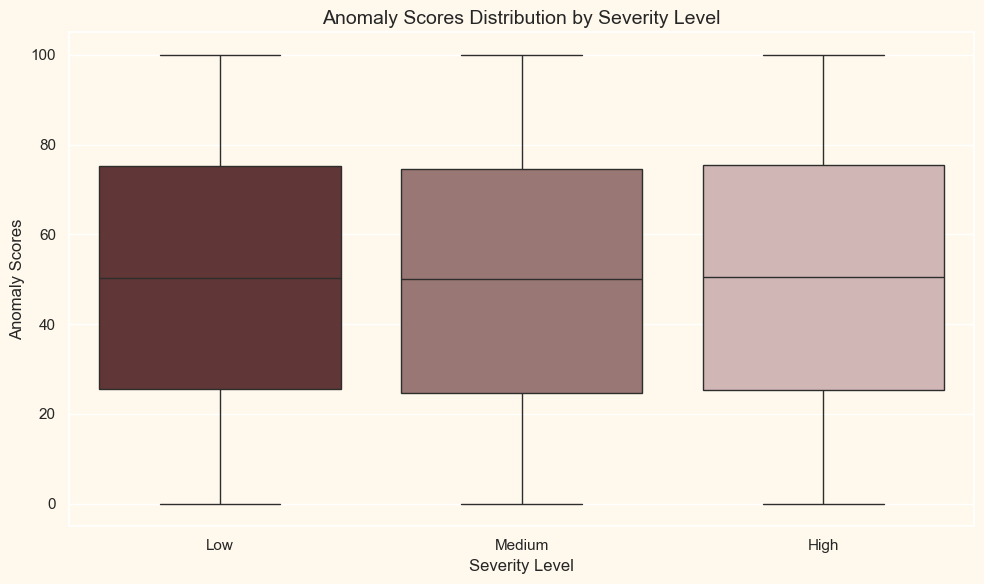

In [55]:
# 6. Anomaly Scores by Severity
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Severity Level', y='Anomaly Scores', palette=palette)
plt.title('Anomaly Scores Distribution by Severity Level', fontsize=14)
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Anomaly Scores', fontsize=12)
plt.tight_layout()
plt.show()


/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/4182308430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_network_segments.index, x=top_network_segments.values, palette=palette)
/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/4182308430.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(y=top_network_segments.index, x=top_network_segments.values, palette=palette)


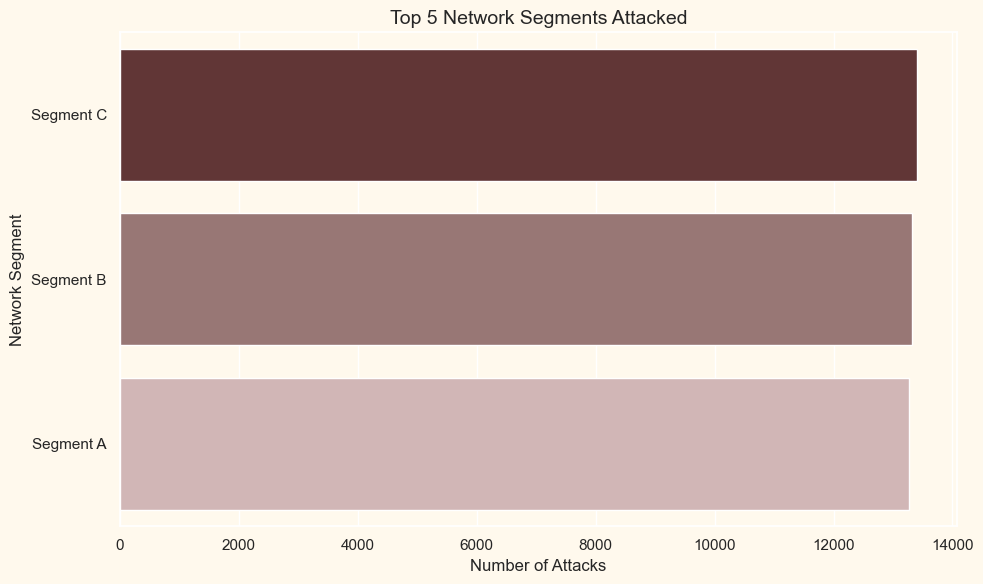

In [57]:
# 7. Top Network Segments
top_network_segments = df['Network Segment'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_network_segments.index, x=top_network_segments.values, palette=palette)
plt.title('Top 5 Network Segments Attacked', fontsize=14)
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Network Segment', fontsize=12)
plt.tight_layout()
plt.show()

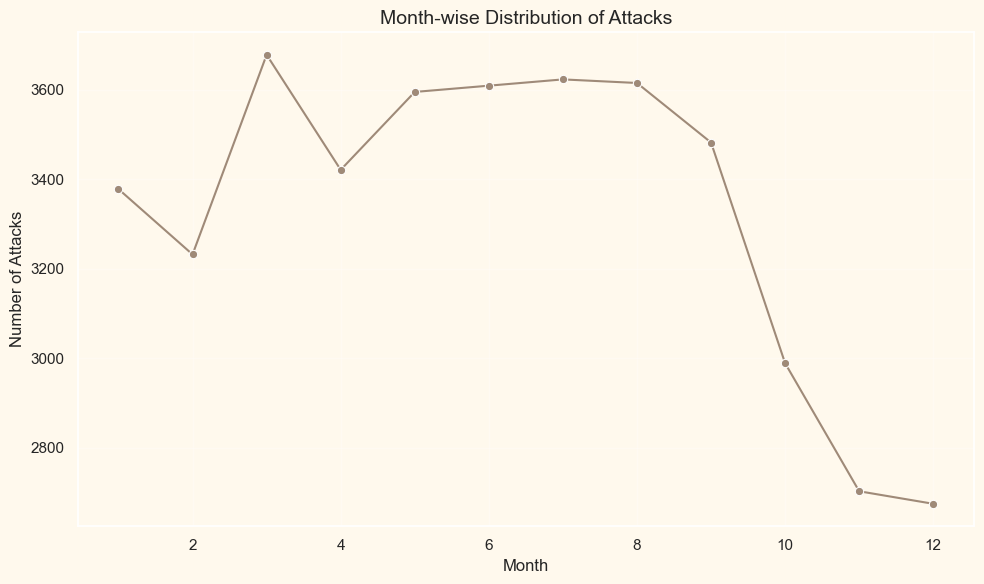

In [18]:
# 8. Month-wise Trends
month_trends = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=month_trends.index, y=month_trends.values, color=palette[4], marker='o')
plt.title('Month-wise Distribution of Attacks', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/3924852635.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_location_data.values, y=geo_location_data.index, palette=palette)
/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/3924852635.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x=geo_location_data.values, y=geo_location_data.index, palette=palette)


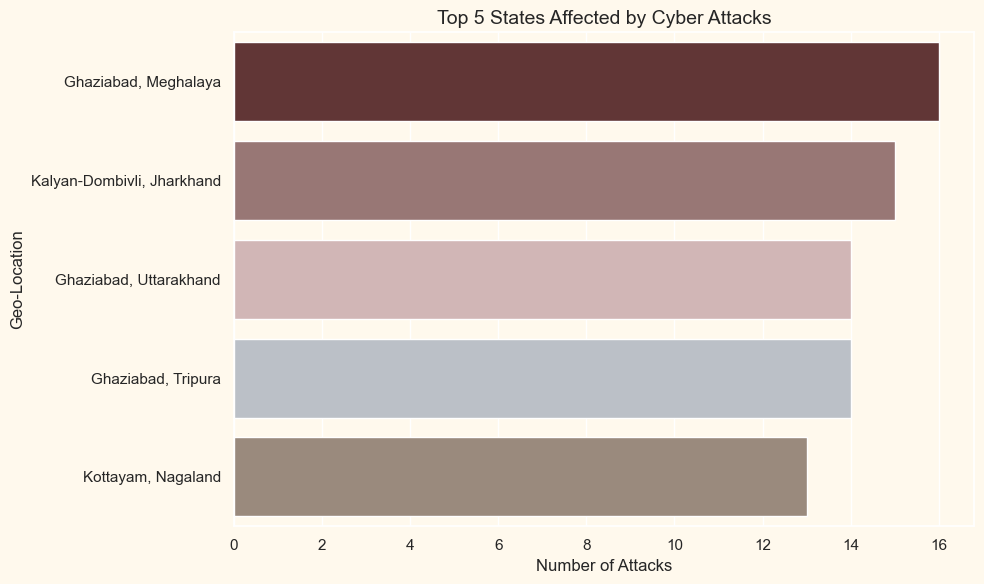

In [19]:
# 9. Top Affected Countries
geo_location_data = df['Geo-location Data'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=geo_location_data.values, y=geo_location_data.index, palette=palette)
plt.title('Top 5 States Affected by Cyber Attacks', fontsize=14)
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Geo-Location', fontsize=12)
plt.tight_layout()
plt.show()

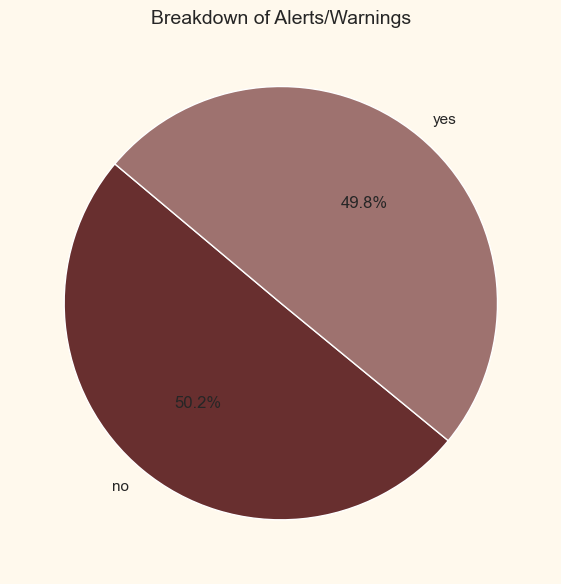

In [20]:
# 10. Alerts Breakdown
alerts_data = df['Alerts/Warnings'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(alerts_data.values, labels=alerts_data.index, autopct='%1.1f%%', colors=palette, startangle=140)
plt.title('Breakdown of Alerts/Warnings', fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/3367306660.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=protocol_data.index, x=protocol_data.values, palette=palette)
/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/3367306660.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(y=protocol_data.index, x=protocol_data.values, palette=palette)


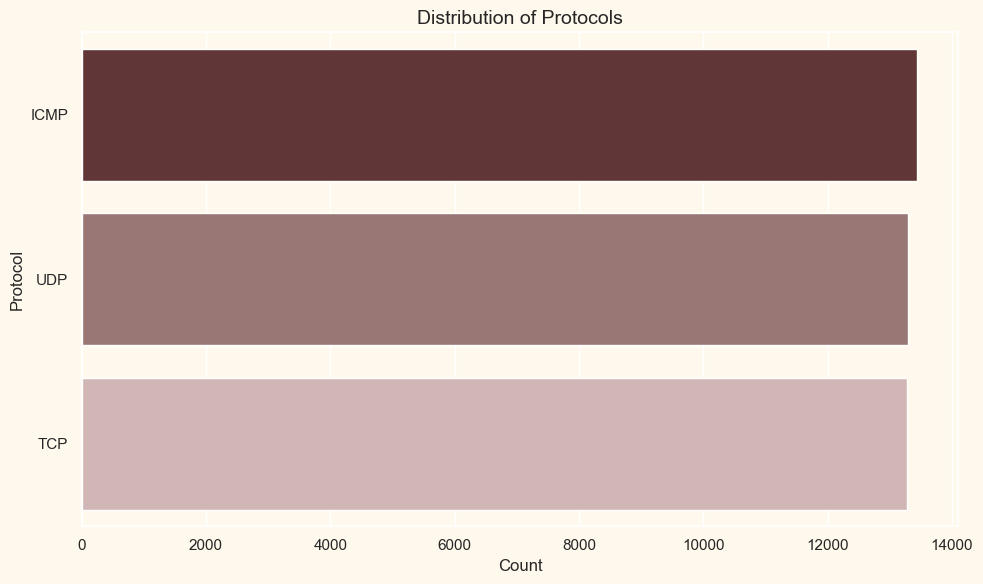

In [21]:
# 11. Distribution of Protocols
plt.figure(figsize=(10, 6))
protocol_data = df['Protocol'].value_counts()
sns.barplot(y=protocol_data.index, x=protocol_data.values, palette=palette)
plt.title('Distribution of Protocols', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Protocol', fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/1622251086.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_data.values, y=action_data.index, palette=palette)
/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/1622251086.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=action_data.values, y=action_data.index, palette=palette)


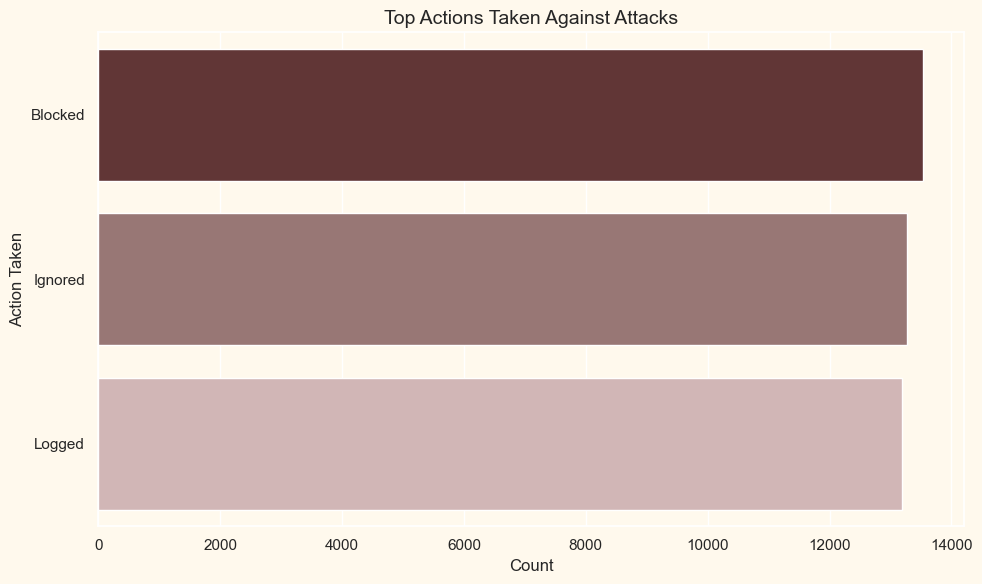

In [22]:
# 13. Top Actions Taken
action_data = df['Action Taken'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=action_data.values, y=action_data.index, palette=palette)
plt.title('Top Actions Taken Against Attacks', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Action Taken', fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/424300075.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_type_data.index, y=traffic_type_data.values, palette=palette)
/var/folders/xz/q94zrrts0633czyfk72bc8tr0000gn/T/ipykernel_62961/424300075.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=traffic_type_data.index, y=traffic_type_data.values, palette=palette)


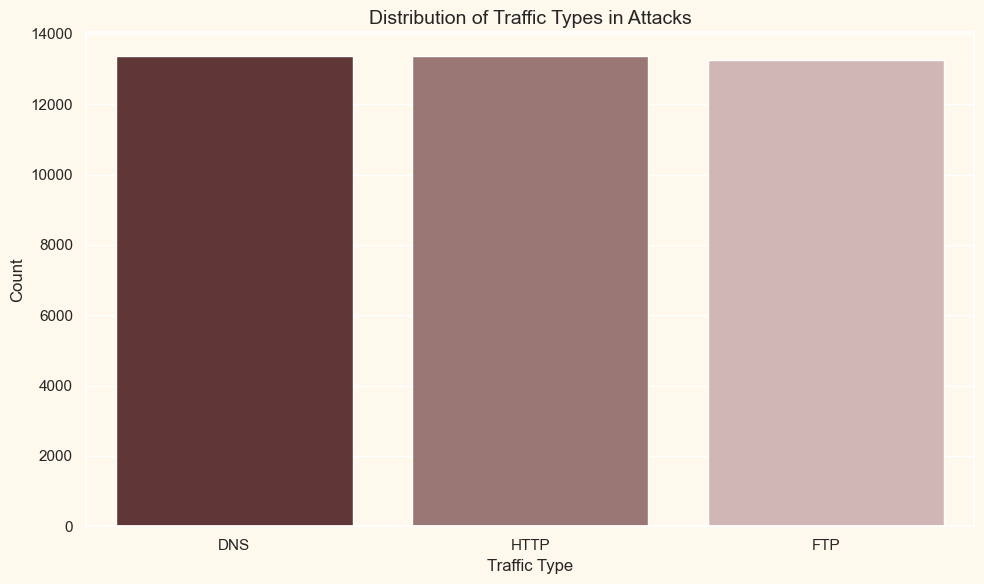

In [23]:
# 14. Traffic Types
plt.figure(figsize=(10, 6))
traffic_type_data = df['Traffic Type'].value_counts()
sns.barplot(x=traffic_type_data.index, y=traffic_type_data.values, palette=palette)
plt.title('Distribution of Traffic Types in Attacks', fontsize=14)
plt.xlabel('Traffic Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

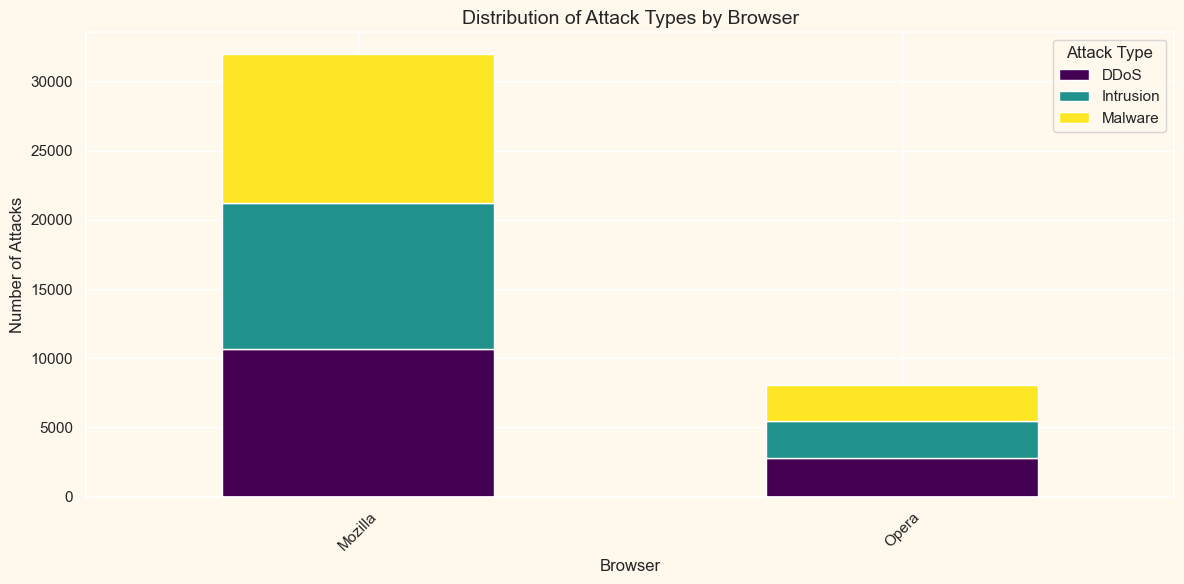

In [24]:
#15 . Distribution of Attack Types by Browser
browser_attack_data = df.groupby(['Browser', 'Attack Type']).size().unstack(fill_value=0)
browser_attack_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")
plt.title('Distribution of Attack Types by Browser', fontsize=14)
plt.xlabel('Browser', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

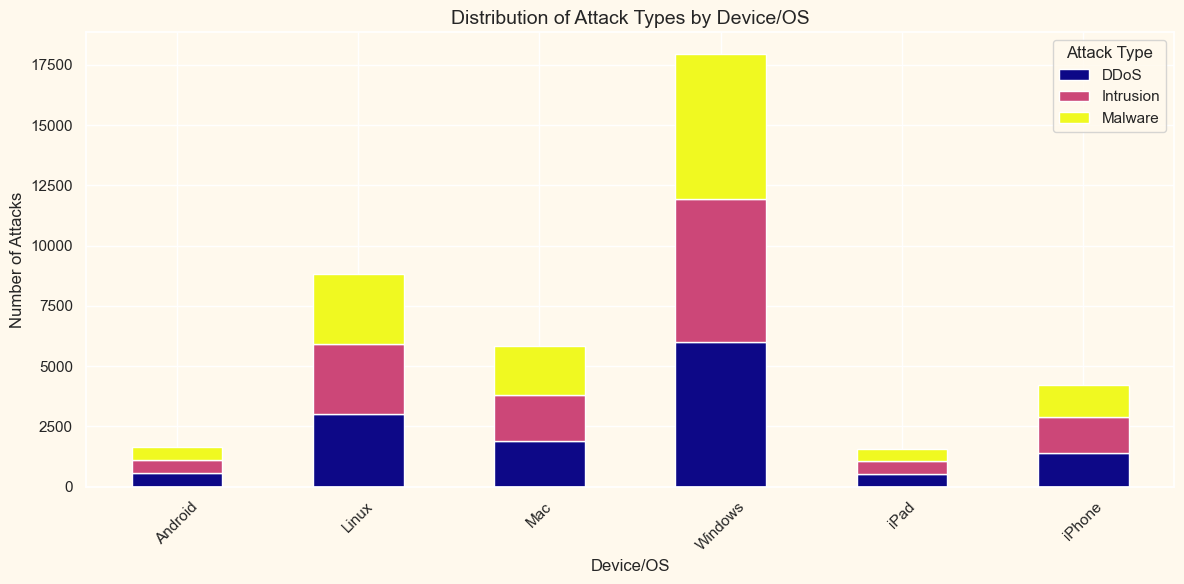

In [25]:
#16. . Distribution of Attack Types by Device/OS
os_attack_data = df.groupby(['Device/OS', 'Attack Type']).size().unstack(fill_value=0)
os_attack_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="plasma")
plt.title('Distribution of Attack Types by Device/OS', fontsize=14)
plt.xlabel('Device/OS', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()